In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
df  = pd.read_csv('Train.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
# statistical info
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [4]:
# datatype of attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
# check unique values in dataset
df.apply(lambda x: len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [6]:
# check for null values
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
# check for categorical attributes
cat_col = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'object':
        cat_col.append(x)
cat_col

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [8]:
cat_col.remove('Item_Identifier')
cat_col.remove('Outlet_Identifier')
cat_col

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [9]:
# print the categorical columns
for col in cat_col:
    print(col)
    print(df[col].value_counts())
    print()

Item_Fat_Content
Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

Item_Type
Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

Outlet_Size
Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

Outlet_Location_Type
Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: count, dtype: int64

Outlet_Type
Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2   

In [10]:
# fill the missing values
item_weight_mean = df.pivot_table(values = "Item_Weight", index = 'Item_Identifier')
item_weight_mean

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


In [11]:
miss_bool = df['Item_Weight'].isnull()
miss_bool

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Name: Item_Weight, Length: 8523, dtype: bool

In [12]:
for i, item in enumerate(df['Item_Identifier']):
    if miss_bool[i]:
        if item in item_weight_mean:
            df['Item_Weight'][i] = item_weight_mean.loc[item]['Item_Weight']
        else:
            df['Item_Weight'][i] = np.mean(df['Item_Weight'])

In [13]:
df['Item_Weight'].isnull().sum()

0

In [14]:
outlet_size_mode = df.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
outlet_size_mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [15]:
miss_bool = df['Outlet_Size'].isnull()
df.loc[miss_bool, 'Outlet_Size'] = df.loc[miss_bool, 'Outlet_Type'].apply(lambda x: outlet_size_mode[x])

In [16]:
df['Outlet_Size'].isnull().sum()

0

In [17]:
sum(df['Item_Visibility']==0)

526

In [18]:
# replace zeros with mean
df.loc[:, 'Item_Visibility'].replace([0], [df['Item_Visibility'].mean()], inplace=True)

In [19]:
sum(df['Item_Visibility']==0)

0

In [20]:
# combine item fat content
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF':'Low Fat', 'reg':'Regular', 'low fat':'Low Fat'})
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

In [21]:
df['Outlet_Years'] = 2024 - df['Outlet_Establishment_Year']

In [22]:
df['Outlet_Years']

0       25
1       15
2       25
3       26
4       37
        ..
8518    37
8519    22
8520    20
8521    15
8522    27
Name: Outlet_Years, Length: 8523, dtype: int64

In [23]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,25
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,15
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,25
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,26
4,NCD19,8.93,Low Fat,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,37


<Axes: xlabel='Item_Weight', ylabel='Density'>

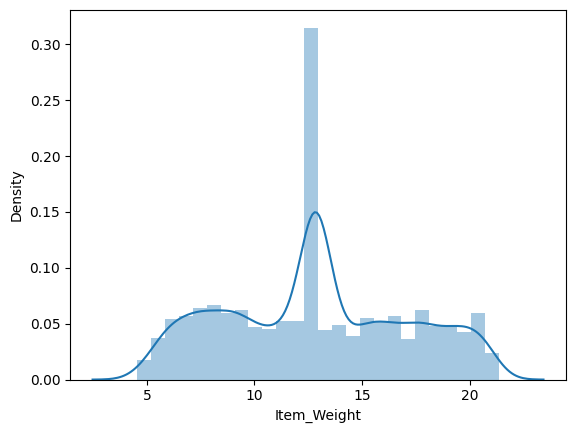

In [24]:
sns.distplot(df['Item_Weight'])

<Axes: xlabel='Item_Visibility', ylabel='Density'>

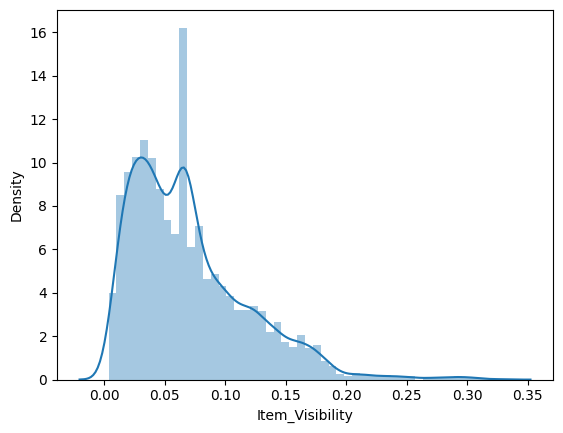

In [25]:
sns.distplot(df['Item_Visibility'])

<Axes: xlabel='Item_MRP', ylabel='Density'>

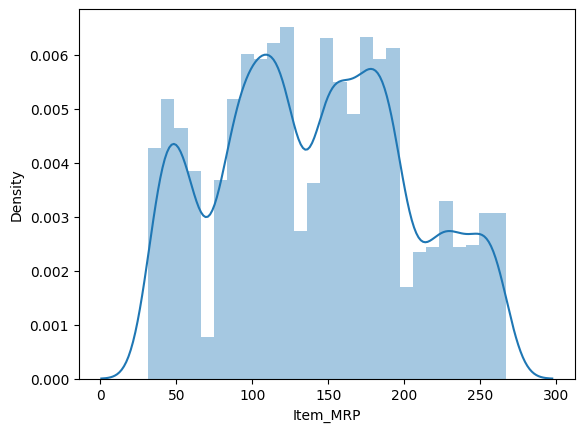

In [26]:
sns.distplot(df['Item_MRP'])

<Axes: xlabel='Item_Outlet_Sales', ylabel='Density'>

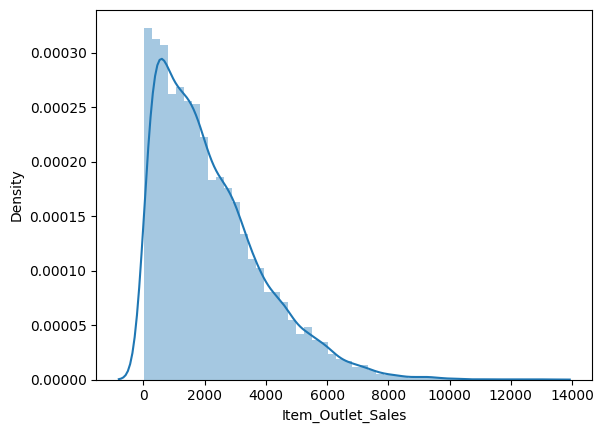

In [27]:
sns.distplot(df['Item_Outlet_Sales'])

In [28]:
# log transformation
df['Item_Outlet_Sales'] = np.log(1+df['Item_Outlet_Sales'])

<Axes: xlabel='Item_Outlet_Sales', ylabel='Density'>

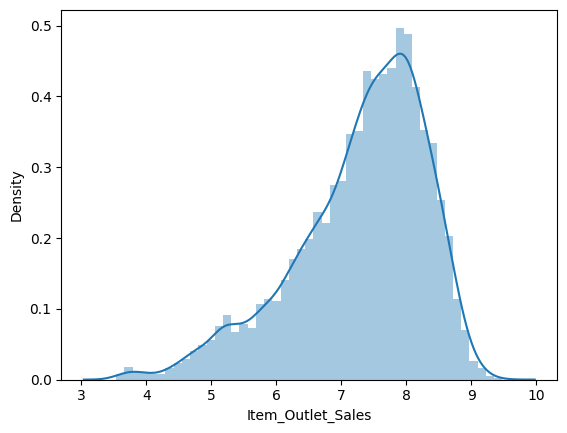

In [29]:
sns.distplot(df['Item_Outlet_Sales'])

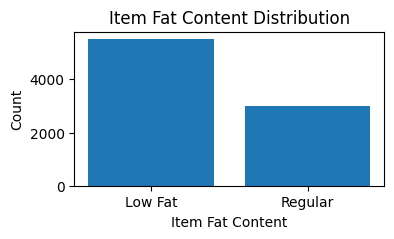

In [30]:
# Count the occurrences of each item fat content
item_fat_content_counts = df['Item_Fat_Content'].value_counts()

# Set the figure size
plt.figure(figsize=(4, 2))

# Create a bar plot
plt.bar(item_fat_content_counts.index, item_fat_content_counts.values)

# Set plot title and labels
plt.title('Item Fat Content Distribution')
plt.xlabel('Item Fat Content')
plt.ylabel('Count')

# Show the plot
plt.show()

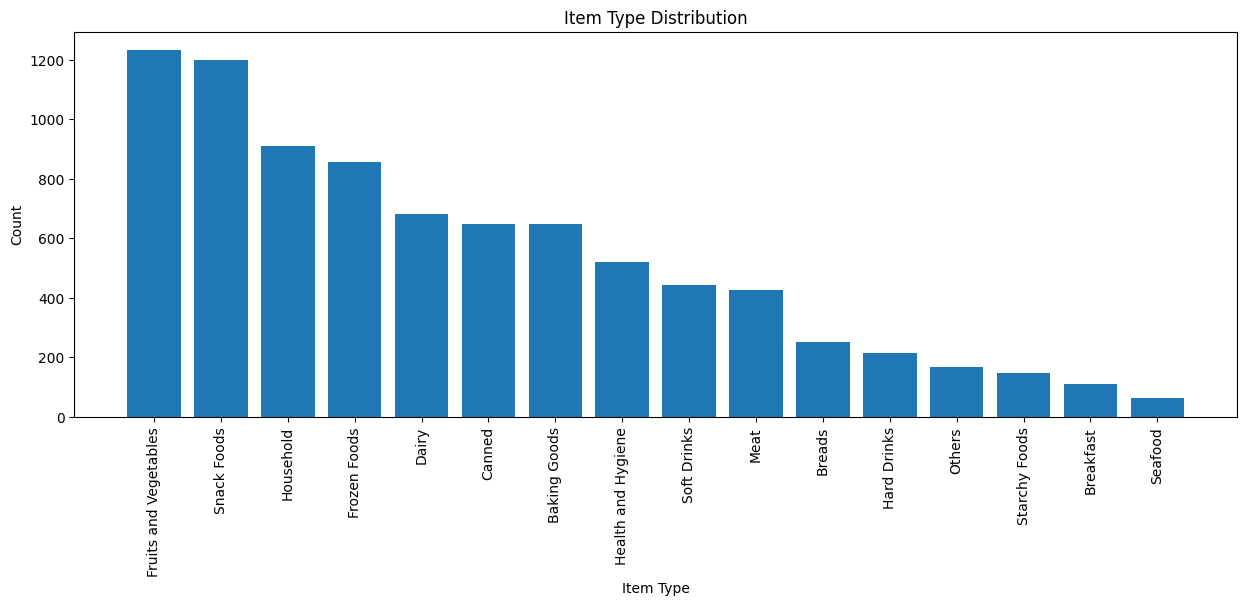

In [31]:
plt.figure(figsize=(15, 5))

# Count the occurrences of each item type
item_type_counts = df['Item_Type'].value_counts()

# Create a bar plot
plt.bar(item_type_counts.index, item_type_counts.values)

# Set x-axis labels and rotate them for better readability
plt.xticks(item_type_counts.index, rotation=90)

# Set plot title and labels
plt.title('Item Type Distribution')
plt.xlabel('Item Type')
plt.ylabel('Count')

# Show the plot
plt.show()

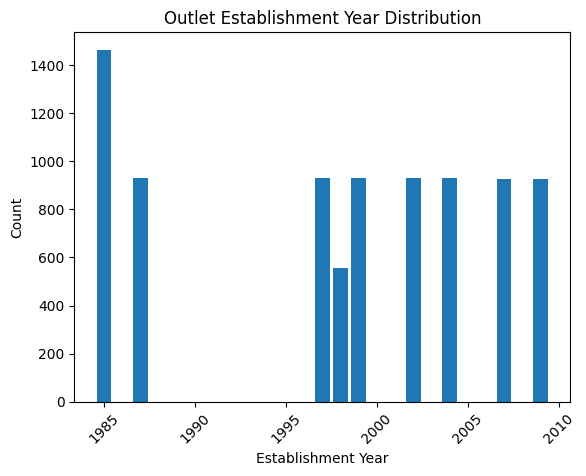

In [32]:
establishment_year_counts = df['Outlet_Establishment_Year'].value_counts()

# Sort the establishment years in ascending order
establishment_year_counts = establishment_year_counts.sort_index()

# Create a bar plot
plt.bar(establishment_year_counts.index, establishment_year_counts.values)

# Set plot title and labels
plt.title('Outlet Establishment Year Distribution')
plt.xlabel('Establishment Year')
plt.ylabel('Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

<Axes: xlabel='count', ylabel='Outlet_Size'>

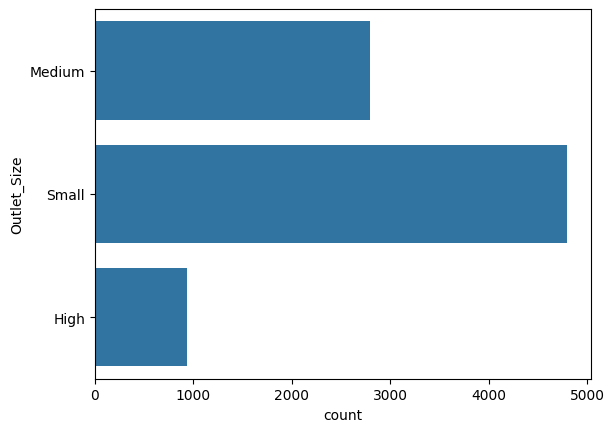

In [33]:
sns.countplot(df['Outlet_Size'])

<Axes: xlabel='count', ylabel='Outlet_Location_Type'>

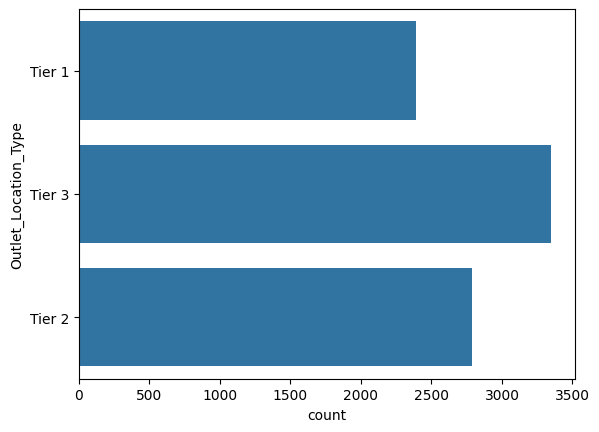

In [34]:
sns.countplot(df['Outlet_Location_Type'])

<Axes: xlabel='count', ylabel='Outlet_Type'>

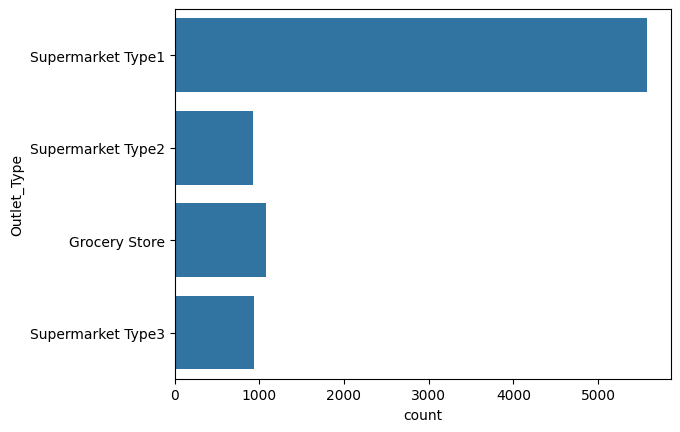

In [35]:
sns.countplot(df['Outlet_Type'])

In [36]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Years
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,8.225808,25
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,6.096776,15
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,7.648868,25
3,FDX07,19.200,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,6.597664,26
4,NCD19,8.930,Low Fat,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,6.903451,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,7.929984,37
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Small,Tier 2,Supermarket Type1,6.310436,22
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,7.085159,20
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,7.521100,15


In [37]:
#'Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_Type'
df['Item_Type'].value_counts()

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

In [38]:

enc = LabelEncoder()
df['Item_Fat_Content'] = enc.fit_transform(df['Item_Fat_Content'])
df['Outlet_Size'] = enc.fit_transform(df['Outlet_Size'])
df['Outlet_Location_Type'] = enc.fit_transform(df['Outlet_Location_Type'])
df['Outlet_Type'] = enc.fit_transform(df['Outlet_Type'])
df['Item_Type'] = enc.fit_transform(df['Item_Type'])


In [39]:
X = df.drop(columns=['Outlet_Establishment_Year', 'Item_Identifier', 'Outlet_Identifier','Item_Outlet_Sales'])
y = df['Item_Outlet_Sales']
X

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Years
0,9.300,0,0.016047,4,249.8092,1,0,1,25
1,5.920,1,0.019278,14,48.2692,1,2,2,15
2,17.500,0,0.016760,10,141.6180,1,0,1,25
3,19.200,1,0.066132,6,182.0950,2,2,0,26
4,8.930,0,0.066132,9,53.8614,0,2,1,37
...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,13,214.5218,0,2,1,37
8519,8.380,1,0.046982,0,108.1570,2,1,1,22
8520,10.600,0,0.035186,8,85.1224,2,1,1,20
8521,7.210,1,0.145221,13,103.1332,1,2,2,15


In [40]:
df['Item_Type'].value_counts()

Item_Type
6     1232
13    1200
9      910
5      856
4      682
3      649
0      648
8      520
14     445
10     425
1      251
7      214
11     169
15     148
2      110
12      64
Name: count, dtype: int64

In [41]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error,root_mean_squared_error
def train(model, X, y):
    # train the model
    model.fit(X, y)
    
    # predict the training set
    pred1 = model.predict(X)
    print(pred1)
    pred = np.exp(pred1)-1
    print(pred)
    
    # perform cross-validation
    cv_score = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
    cv_score = np.abs(np.mean(cv_score))
    
    print("Model Report")
    print("MSE:",mean_squared_error(y,pred1))
    print("CV Score:", cv_score) 

In [42]:
def train_and_evaluate(model, X_train, y_train, X_test, y_test):
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the training set
    train_pred = model.predict(X_train)
    print(train_pred)
    train_pred_log = np.exp(train_pred)-1
    print(train_pred_log)
    # Perform cross-validation on the training set
    train_cv_score = cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
    train_cv_score = np.abs(np.mean(train_cv_score))
    
    print("Training Data Report")
    print("MSE (Training):", mean_squared_error(y_train, train_pred))
    print("RMSE (Training):", np.sqrt(mean_squared_error(y_train, train_pred)))
    print("MAE (Training):",mean_absolute_error(y_train, train_pred))
    #print("CV Score (Training):", train_cv_score) 
    print("R2 score Training : " ,r2_score(y_train, train_pred))
    
    # Predict on the testing set
    test_pred = model.predict(X_test)
    test_pred_log = np.exp(test_pred)-1
    print(test_pred_log)
    # Evaluate on the testing set
    test_mse = mean_squared_error(y_test, test_pred)
    
    print("\nTesting Data Report")
    print("MSE (Testing):", test_mse)
    print("RMSE (Testing):", np.sqrt(test_mse))
    print("MAE (Testing):",mean_absolute_error(y_test, test_pred))
    print("R2 score Testing : " ,r2_score(y_test, test_pred))


In [43]:
from sklearn.model_selection import train_test_split
x1_train,x1_test,y1_train,y1_test = train_test_split(X,y,test_size=0.2)

In [44]:
from sklearn.ensemble import RandomForestRegressor
model4 = RandomForestRegressor()
train_and_evaluate(model4, x1_train,y1_train,x1_test,y1_test)

[8.54874085 7.5910087  7.72929604 ... 7.99160394 7.19645975 8.04475549]
[5159.25278581 1979.31003609 2273.0008274  ... 2955.03445331 1333.6972228
 3116.40278641]
Training Data Report
MSE (Training): 0.042771506857324545
RMSE (Testing): 0.20681273378910822
MAE (Testing): 0.15933059505751682
R2 score Training :  0.9591388135964893
[2769.86835111 1512.8828801   967.3066379  ... 2550.41300137 7197.61439409
 2958.45677756]

Testing Data Report
MSE (Testing): 0.3032367300084002
RMSE (Testing): 0.5506693472569544
MAE (Testing): 0.43424412317322186
R2 score Testing :  0.685707318322812


In [45]:
from xgboost import XGBRegressor
model5 = XGBRegressor()
train_and_evaluate(model5, x1_train,y1_train,x1_test,y1_test)

[8.543583  7.511537  8.031762  ... 7.984425  7.3542867 8.046141 ]
[5132.705  1828.0227 3076.1592 ... 2933.8894 1561.8817 3120.7239]
Training Data Report
MSE (Training): 0.10503176115193359
RMSE (Testing): 0.3240860397362614
MAE (Testing): 0.2467304869992333
R2 score Training :  0.8996593132658544
[3491.5295  1167.9185   989.62823 ... 2697.5898  7997.59    2655.0654 ]

Testing Data Report
MSE (Testing): 0.31570377146573875
RMSE (Testing): 0.5618752276669071
MAE (Testing): 0.4368923496868031
R2 score Testing :  0.6727857309804769


In [46]:
from xgboost import XGBRFRegressor
model6 = XGBRFRegressor()
train_and_evaluate(model6, x1_train,y1_train,x1_test,y1_test)

[8.669016  7.7021194 8.159662  ... 7.920672  7.700432  7.942364 ]
[5818.769  2212.033  3496.0056 ... 2752.6208 2208.302  2813.0056]
Training Data Report
MSE (Training): 0.25208568116154395
RMSE (Testing): 0.5020813491472711
MAE (Testing): 0.38774002161231624
R2 score Training :  0.7591733197065549
[3542.0823 1440.7136 1199.8181 ... 3062.4646 5821.0674 2375.552 ]

Testing Data Report
MSE (Testing): 0.2764349196992335
RMSE (Testing): 0.5257707862740507
MAE (Testing): 0.40727752083564045
R2 score Testing :  0.713486317376251


In [47]:
import pickle
pickle.dump(model6,open('sales1_prd.pkl','wb'))